In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [2]:
# import data file
df = pd.read_excel('world-population.xlsm')
df.head()

,Year,Population
0,1960,3028654024
1,1961,3068356747
2,1962,3121963107
3,1963,3187471383
4,1964,3253112403


In [3]:
def billions(x, pos):
    'The two args are the value and tick position'
    return '%1.0f B' % (x * 1e-9)
formatter = FuncFormatter(billions)

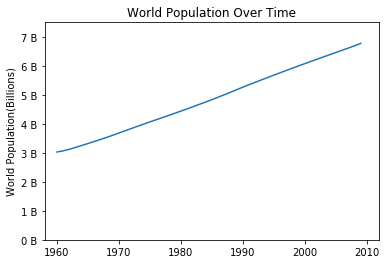

In [4]:
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.axis([1958, 2012,0,7500000000])
plt.plot(df["Year"],df["Population"])
plt.ylabel('World Population(Billions)')
plt.title('World Population Over Time')
plt.savefig('line.png')
plt.show()

In [5]:
conditions = [(df['Year'] < 1970),
    (df['Year'] >= 1970) & (df['Year'] < 1980),
    (df['Year'] >= 1980) & (df['Year'] < 1990),
    (df['Year'] >= 1990) & (df['Year'] < 2000),
    (df['Year'] >= 2000)]
choices = ["1960's", "1970's", "1980's", "1990's","2000's"]
df['Decade'] = np.select(conditions, choices, default = "2000's")
df.to_csv('decades.csv')
df.head()

,Year,Population,Decade
0,1960,3028654024,1960's
1,1961,3068356747,1960's
2,1962,3121963107,1960's
3,1963,3187471383,1960's
4,1964,3253112403,1960's


In [6]:
decade_df = pd.DataFrame(df.groupby('Decade')['Population'].sum()).reset_index()
decade_df

,Decade,Population
0,1960's,32969730985
1,1970's,40268472935
2,1980's,48006617815
3,1990's,56377545062
4,2000's,64243300123


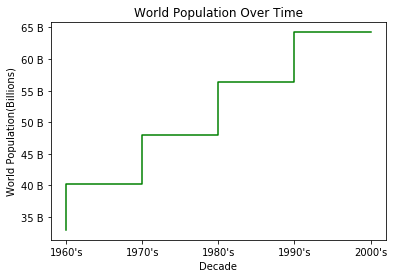

In [7]:
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.plot(decade_df["Decade"],decade_df["Population"], drawstyle='steps', color='green')
plt.ylabel('World Population(Billions)')
plt.xlabel('Decade')
plt.title('World Population Over Time')
plt.savefig('step.png')
plt.show()